## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df=datasets.load_iris()
df=pd.DataFrame(df.data,columns=df.feature_names)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [3]:
df.shape

(150, 4)

## Making sure there're no null values in the dataset

In [4]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [5]:
# Checking summary statistics for the data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking if there are outliers and removing them

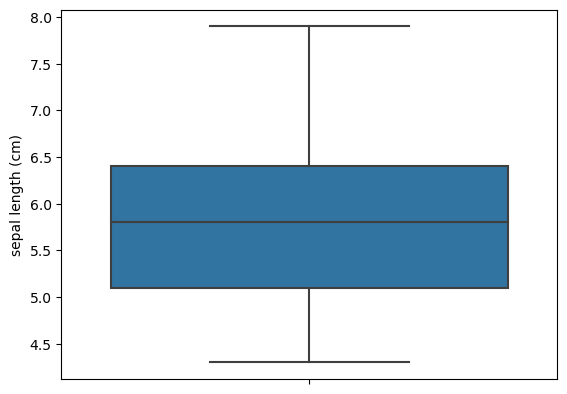

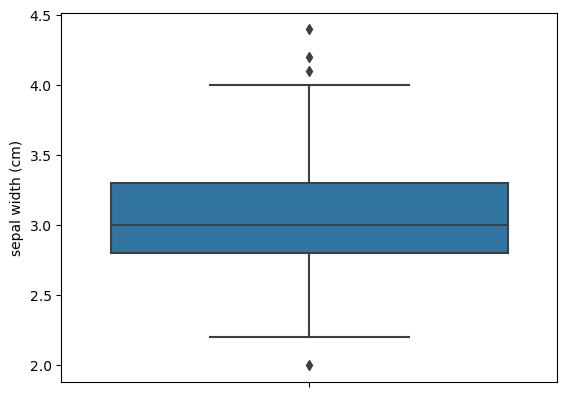

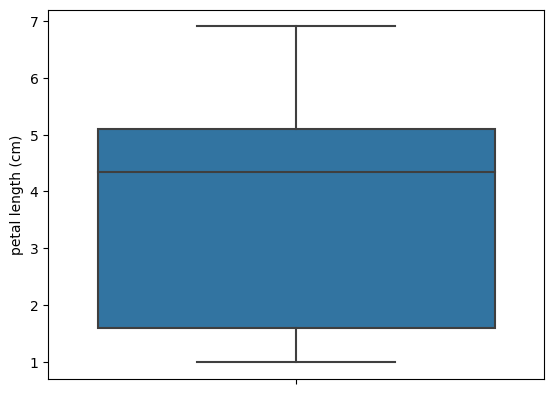

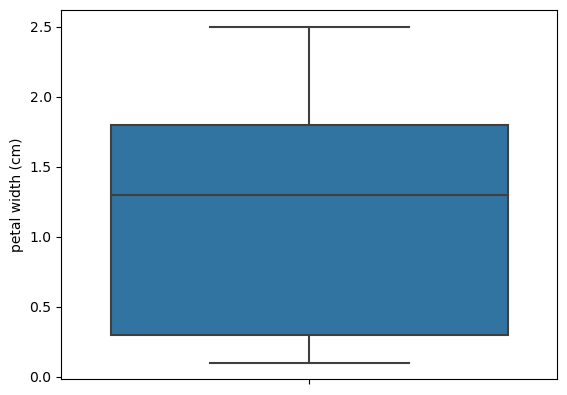

In [6]:
cols=df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

#### From the above boxplot we can say there are outliers in the column('sepal width (cm)')
#### So, this is how we remove them: 

In [7]:
q1=df['sepal width (cm)'].quantile(0.25)
q3=df['sepal width (cm)'].quantile(0.75)
iqr=q3-q1
df=df[(df['sepal width (cm)']>=q1-1.5*iqr) & (df['sepal width (cm)']<=q3+1.5*iqr)]
df.shape

(146, 4)

#### we now can see the effect of removing the outliers on the shape of data that is reduced from 150 to 146 

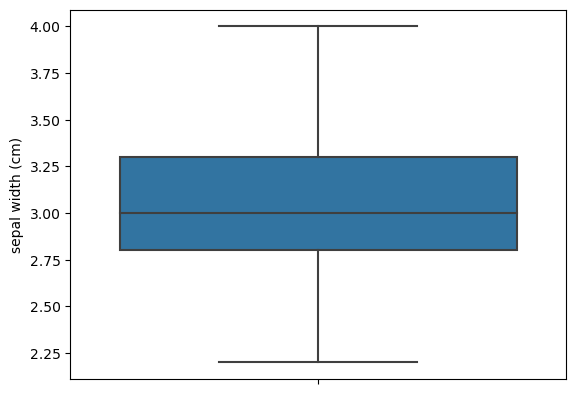

In [8]:
sns.boxplot(y=df['sepal width (cm)'])
plt.show()

#### The above boxplot showed us that the outliers are certainly removed

In [9]:
#standardizing to avoid bias
st_scalar=StandardScaler()
df_nomalized=st_scalar.fit_transform(df)

## Finding the optimal no of clusters: 

In [10]:
cluster_range=range(1,25)
cluster_errors=[]

for num_cluster in cluster_range:
    clusters=KMeans(num_cluster,n_init=10)
    clusters.fit(df_nomalized)
    
    cluster_errors.append(clusters.inertia_)

clusters_df=pd.DataFrame({'num_cluster':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:25]

,num_cluster,cluster_errors
0,1,584.000000
1,2,217.499302
2,3,134.345832
3,4,109.578228
4,5,88.927558
5,6,77.731235
6,7,68.003093
7,8,59.110605
8,9,52.183398
9,10,45.795495


## Plotting elbow curve to visualize no of clusters

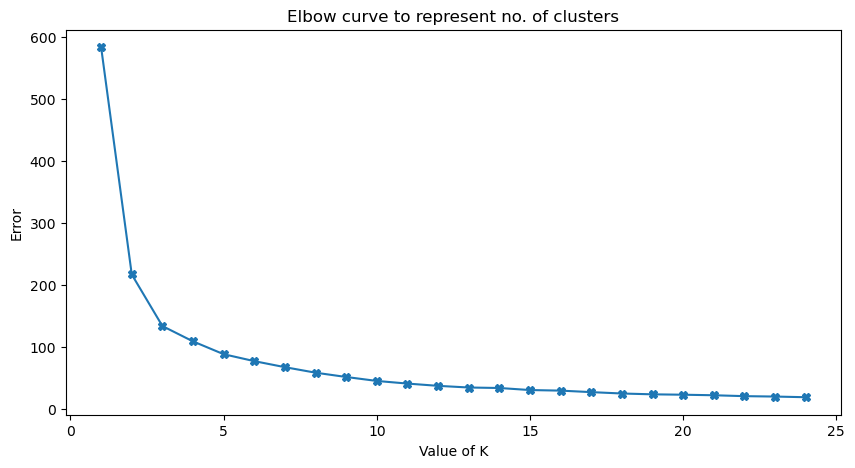

In [11]:
plt.figure(figsize=(10,5))
plt.plot(clusters_df.num_cluster,clusters_df.cluster_errors, marker='X')
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.title('Elbow curve to represent no. of clusters')
plt.show()

## Creating an object of the model and fitting it 

In [12]:
model=KMeans(n_clusters=3,max_iter=50)
model.fit(df)

KMeans(max_iter=50, n_clusters=3)

## Analysis of the clusters found

In [13]:
df.index=pd.RangeIndex(len(df.index))
df_km=pd.concat([df,pd.Series(model.labels_)],axis=1)
df_km.columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','ClusterID']
km_clusters_Slength=pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth=pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength=pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth=pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

In [14]:
df2=pd.concat([pd.Series([0,1,2]),km_clusters_Slength,km_clusters_Swidth,km_clusters_Plength,km_clusters_Pwidth],axis=1)
df2

,0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.916393,2.760656,4.408197,1.440984
1,1,4.976596,3.376596,1.461702,0.246809
2,2,6.850000,3.073684,5.742105,2.071053


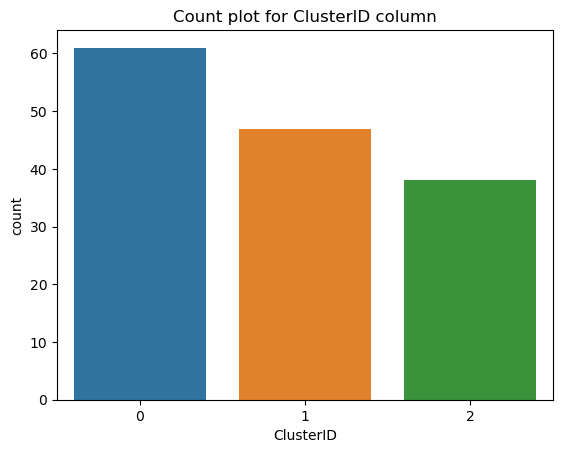

In [15]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

## Scatter plot to visualize clustering 

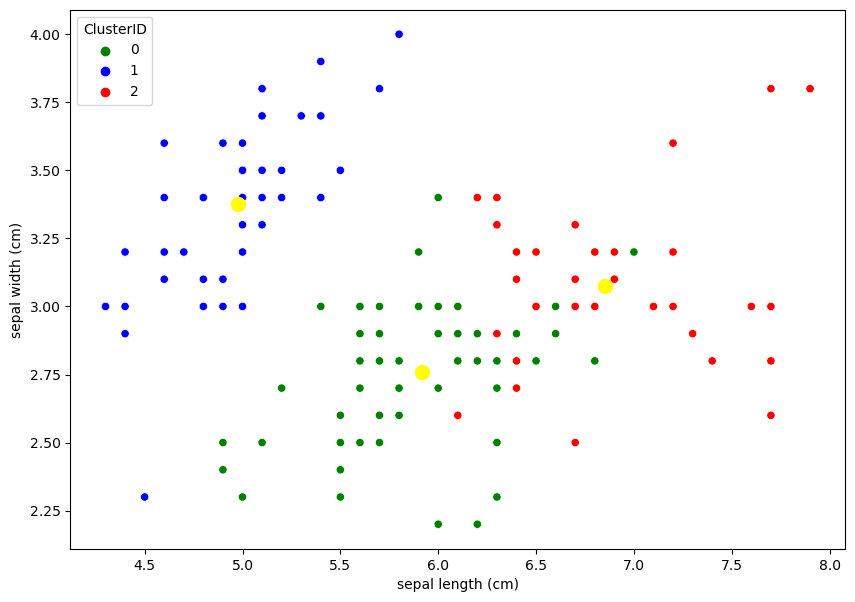

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)' , hue='ClusterID', data=df_km
                ,palette=['green','blue','red'])

#Plotting centroids of the cluster
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s=100,c='yellow',label='Centroids')
plt.show()